In [1]:

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Importing Liabraries

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 37.0 MB/s eta 0:00:00


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import yaml
import matplotlib.patches as patches

sns.set_style('darkgrid')

In [4]:
import yaml

# Define the dataset information
dataset_info = {
    'train': '/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/train/images',
    'val': '/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/val/images',
    'test': '/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/test/images',
    'nc': 11,
    'names': ['airplane', 'boat', 'car', 'cargo ship', 'fighter jet', 'helicopter', 'jet', 'military aircraft', 'propeller plane', 'truck', 'yacht']
}

# Create and save the data.yaml file
data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_info, yaml_file, default_flow_style=False)

# Data Visualization

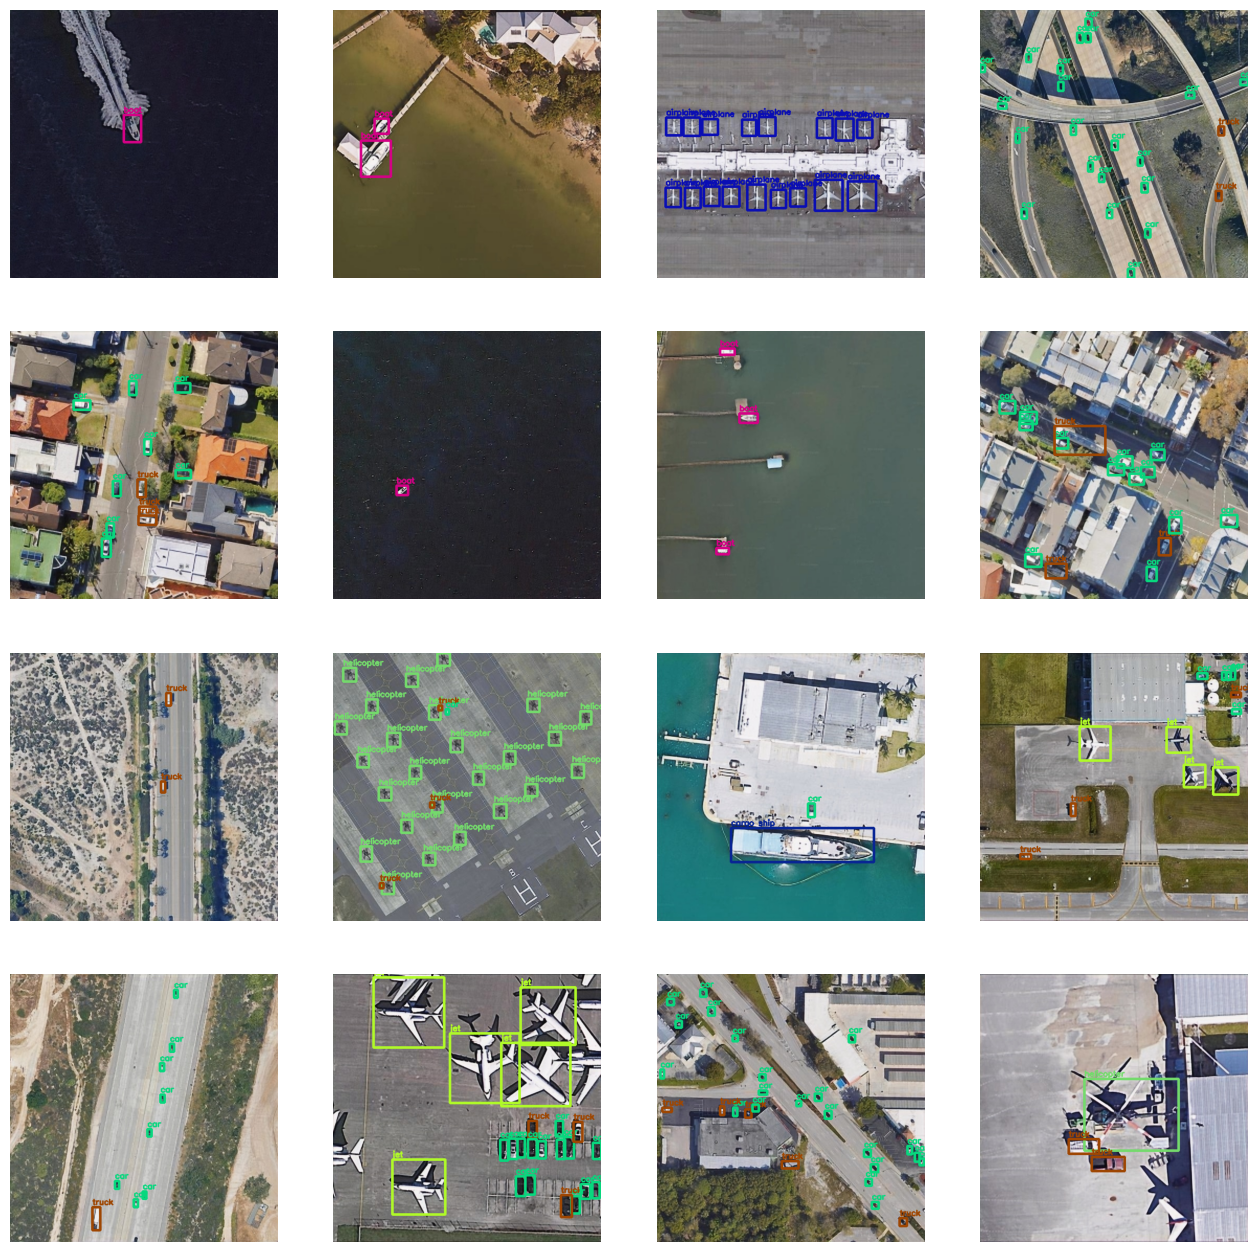

In [5]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/train/images"
train_labels = "/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/train/labels"

test_images = "/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/test/images"
test_labels = "/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/test/labels"

val_images = "/kaggle/input/sr-det-512//SR-DET-512sat-gen-512x512/val/images"
val_labels = "/kaggle/input/sr-det-512//SR-DET-512sat-gen-512x512/val/labels"

# Load class information from the YAML file
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, "r") as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
classes = data["names"]

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Function to generate a random color
def random_color():
    return tuple(random.randint(0, 255) for _ in range(3))

# Assign different colors to each class
class_colors = {class_name: random_color() for class_name in classes}

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        
        # Use the color assigned to the class
        color = class_colors[classes[int(class_id)]]
        
        # Draw the rectangle with the assigned color
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)
        
        # Add class label to the rectangle
        class_name = classes[int(class_id)]
        cv2.putText(image, class_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


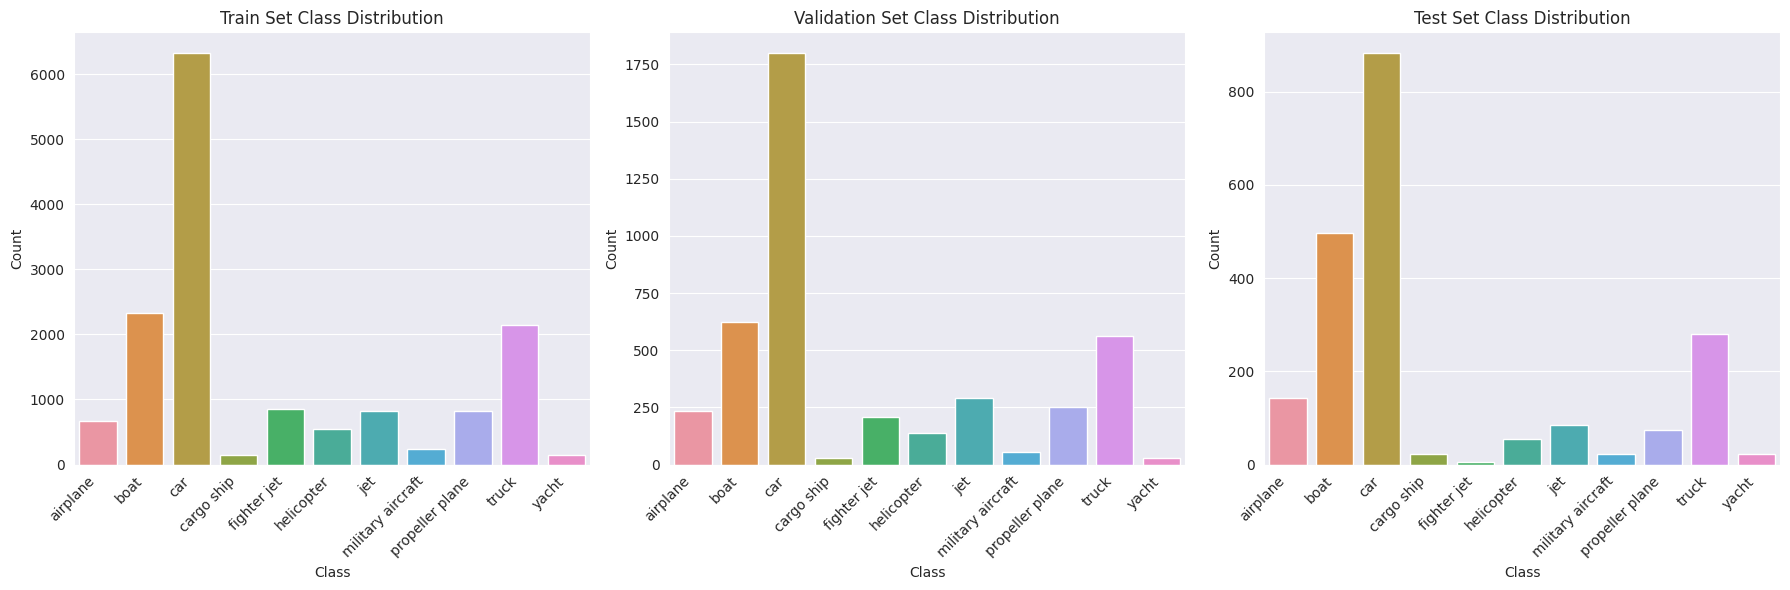

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Define class names
class_names = {
    0: 'airplane',
    1: 'boat',
    2: 'car',
    3: 'cargo ship',
    4: 'fighter jet',
    5: 'helicopter',
    6: 'jet',
    7: 'military aircraft',
    8: 'propeller plane',
    9: 'truck',
    10: 'yacht'
}

def parse_yolov8_annotations(annotation_path):
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            line = line.strip().split()
            class_label = int(line[0])
            annotations.append(class_label)
    return annotations

# Replace these paths with your actual paths
train_path = "/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/train/labels"
valid_path = "/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/val/labels"
test_path ="/kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/test/labels"

# Load annotations for train, validation, and test sets
train_annotations = []
valid_annotations = []
test_annotations = []

for file_name in os.listdir(train_path):
    train_annotations.extend(parse_yolov8_annotations(os.path.join(train_path, file_name)))

for file_name in os.listdir(valid_path):
    valid_annotations.extend(parse_yolov8_annotations(os.path.join(valid_path, file_name)))

for file_name in os.listdir(test_path):
    test_annotations.extend(parse_yolov8_annotations(os.path.join(test_path, file_name)))

# Convert to Pandas DataFrame
train_df = pd.DataFrame({'class': train_annotations})
valid_df = pd.DataFrame({'class': valid_annotations})
test_df = pd.DataFrame({'class': test_annotations})

# Plot class distribution for train set
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='class', data=train_df)
plt.title('Train Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().set_xticklabels([class_names[label] for label in plt.gca().get_xticks()])  # Replace numeric labels with names

# Plot class distribution for validation set
plt.subplot(1, 3, 2)
sns.countplot(x='class', data=valid_df)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().set_xticklabels([class_names[label] for label in plt.gca().get_xticks()])  # Replace numeric labels with names

# Plot class distribution for test set
plt.subplot(1, 3, 3)
sns.countplot(x='class', data=test_df)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().set_xticklabels([class_names[label] for label in plt.gca().get_xticks()])  # Replace numeric labels with names

plt.tight_layout()
plt.show()


# Building & Training Model

In [7]:
#disable wandb
import os
os.environ["WANDB_DISABLED"] = "true"

In [8]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/working/data.yaml',
            epochs =120,
            imgsz = 512,
            seed = 42,
            batch = 8,
            workers = 4,
            project='yolo8',  # Specify your project name
            name='result') 

100%|██████████| 131M/131M [00:00<00:00, 363MB/s]


Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/data.yaml, epochs=120, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolo8, name=result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 69.5MB/s]
2024-03-26 05:07:12,901	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-26 05:07:13,756	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-26 05:07:15.967272: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 05:07:15.967358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 05:07:16.093324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Tracking run with wandb version 0.16.4
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 279MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/train/labels... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:04<00:00, 306.25it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/val/labels... 420 images, 2 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:01<00:00, 320.23it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/val is not writeable, cache not saved.


Plotting labels to yolo8/result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to yolo8/result
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      6.25G      1.389      1.975      1.073         76        512: 100%|██████████| 184/184 [01:36<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.57it/s]


                   all        420       4220      0.431       0.53      0.459       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      6.63G      1.349      1.449      1.059         84        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]


                   all        420       4220      0.495      0.537      0.537      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      6.76G      1.378      1.431      1.088         65        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]


                   all        420       4220      0.492      0.531      0.536      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      6.79G      1.367      1.359      1.076         93        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]


                   all        420       4220      0.596      0.513      0.571      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      6.79G      1.369      1.293      1.082        115        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]


                   all        420       4220      0.579      0.637      0.623      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120       6.8G       1.33      1.228      1.068         56        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.628      0.683       0.68      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      6.79G      1.304       1.24      1.049        113        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.625      0.642      0.655      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      6.79G      1.263      1.091      1.039        109        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]


                   all        420       4220      0.632      0.667      0.689      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      6.79G      1.267       1.07      1.028         48        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.723      0.655      0.719      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      6.78G      1.234      1.023      1.022         88        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.663      0.695      0.695       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      6.79G      1.221     0.9854      1.014         87        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220        0.7      0.701      0.735      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      6.83G      1.214     0.9818       1.01         86        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.736       0.71      0.737      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      6.83G      1.195     0.9547      1.013        111        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.728      0.734      0.762      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      6.91G      1.171     0.9408      1.009         45        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.738      0.707      0.752      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      6.84G      1.188     0.9442     0.9977         22        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.694      0.743      0.757      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      6.79G      1.155     0.9051     0.9986         84        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.717       0.75      0.756      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      6.81G      1.171     0.9105     0.9919         89        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.757      0.765      0.798      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      6.79G      1.139     0.8475     0.9883        104        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.713      0.746      0.783      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      6.84G      1.129     0.8361     0.9753         53        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.789      0.697      0.783      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      6.83G      1.127     0.8326     0.9797         75        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.697      0.804       0.78      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120       6.8G      1.131     0.8412     0.9743         73        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.753      0.761      0.787      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      6.79G      1.115     0.8349     0.9697         59        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.786      0.783      0.805      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120       6.8G       1.11     0.8065     0.9767         76        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.717      0.788      0.787      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      6.79G      1.095     0.7888     0.9701         43        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.771      0.766      0.797      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      6.84G      1.083     0.7864     0.9681         35        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.793      0.762      0.802      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      6.82G      1.083     0.7858     0.9688        103        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.768      0.771      0.808      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      6.82G      1.066     0.7612     0.9666         39        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.801      0.749      0.805      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      6.79G       1.06     0.7478     0.9553         76        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.783      0.789      0.822      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      6.85G      1.055     0.7393     0.9626         47        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.755      0.793      0.819       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120       6.8G      1.058     0.7279     0.9634        135        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.778      0.769      0.808      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      6.84G      1.063     0.7328     0.9547        127        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.765      0.789       0.81      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120       6.8G      1.034     0.7189     0.9536         41        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.752      0.823      0.819      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120       6.8G      1.051     0.7213     0.9521         49        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.799      0.794      0.818      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      6.79G      1.035     0.7232     0.9464         51        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.804      0.793      0.825      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      6.79G       1.02     0.6924     0.9434        143        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.776       0.79      0.816      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120       6.8G      1.034     0.6998     0.9476        135        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.799      0.809      0.828      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      6.79G      1.025     0.6961     0.9442         77        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.816      0.798      0.836      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      6.87G      1.017     0.6847      0.939        131        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.805      0.804      0.843      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      6.79G      1.002     0.6635     0.9394         47        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.807      0.801      0.834      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      6.85G      1.005     0.6622      0.937         75        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.818        0.8      0.842      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      6.79G      1.006     0.6669     0.9341         56        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.789      0.807      0.835       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120       6.8G      1.002     0.6529     0.9328         55        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.783      0.819      0.828      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120       6.8G     0.9994     0.6573     0.9336        108        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       4220       0.81       0.81      0.844      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      6.79G     0.9817     0.6342     0.9408         69        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.785      0.813      0.831      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      6.79G     0.9904     0.6486     0.9296        103        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.821      0.816      0.852      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      6.79G     0.9822     0.6205     0.9285        111        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.807      0.825      0.839       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      6.81G     0.9883     0.6359      0.925         38        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.804      0.838      0.838      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      6.81G     0.9592     0.6196     0.9274         78        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.813      0.818      0.841      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120       6.8G     0.9852     0.6404     0.9331         69        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.825      0.817      0.848      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120       6.8G     0.9626     0.6137     0.9253         49        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.814       0.83      0.857      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      6.79G     0.9665     0.6178      0.929         76        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.803       0.82      0.857      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      6.81G     0.9521     0.6079     0.9149         77        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.834      0.811      0.841      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      6.83G     0.9668     0.6262     0.9184         49        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.815      0.835      0.847      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120       6.8G     0.9489     0.5951     0.9188         58        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.794      0.834      0.845      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120       6.8G     0.9465     0.5985      0.923         77        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.798      0.818      0.841      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120       6.8G     0.9502     0.5987     0.9208        139        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.836      0.824       0.86      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      6.84G     0.9522     0.5911     0.9147         95        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.798       0.83      0.847      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      6.79G     0.9376     0.5801     0.9129        109        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       4220      0.841      0.804      0.864      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      6.79G     0.9299     0.5714     0.9098         99        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.832      0.805      0.854      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      6.79G     0.9277     0.5645     0.9159        116        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.825      0.812      0.854      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120       6.8G      0.929      0.568     0.9094         63        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.801      0.835       0.85      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120       6.8G     0.9095     0.5509     0.9162         59        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220       0.84       0.82      0.869       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120       6.8G     0.9266     0.5672     0.9162         94        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.838      0.821      0.854      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120       6.8G     0.9101     0.5507     0.9077         82        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.803      0.854      0.862      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120       6.8G     0.9177     0.5603     0.9119         45        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.821      0.797      0.846      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      6.79G     0.8982     0.5433     0.9109         64        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220       0.85      0.803      0.862      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120       6.8G      0.905     0.5479     0.9115         39        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.856      0.825      0.862      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120       6.8G     0.9147     0.5604     0.9101         30        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.807      0.839      0.863      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      6.79G     0.9038      0.545     0.9064         33        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.846      0.823      0.871      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      6.83G     0.8953     0.5407     0.8996         47        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.825       0.84      0.865       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120       6.8G     0.8855     0.5345     0.9011         96        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.842      0.832      0.866      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      6.79G     0.8864     0.5258     0.9001        118        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       4220      0.825      0.842       0.86      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      6.79G     0.8814       0.52     0.8956         28        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.857      0.841      0.868      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120       6.8G     0.8698     0.5065     0.8998         67        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.808      0.827      0.856      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120       6.8G     0.8792     0.5113     0.8939         75        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.808      0.848      0.866      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      6.79G     0.8691     0.5092     0.9012        127        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.856      0.834      0.878      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      6.81G     0.8696     0.5144     0.9008         68        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.837      0.836      0.874      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120       6.8G     0.8672     0.5024     0.8992        101        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.868      0.834      0.874      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120       6.8G      0.859     0.4973     0.8982        112        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       4220      0.842      0.843      0.877      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      6.77G     0.8531     0.4947     0.8954         89        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.841      0.838       0.87      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120       6.8G     0.8414     0.4857     0.8914         71        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.855      0.829      0.872      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      6.78G     0.8461     0.4901     0.8889         64        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.822       0.85      0.871      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120       6.8G     0.8356     0.4782     0.8906         77        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.859      0.828      0.876      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      6.79G     0.8383     0.4859     0.8874         50        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.856      0.831      0.877      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      6.79G     0.8466     0.4759     0.8872         48        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.857      0.832      0.876      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      6.78G       0.84     0.4766     0.8974         53        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.861      0.816      0.867      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      6.79G     0.8339     0.4724     0.8875        105        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.839      0.848      0.877      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120       6.8G     0.8229     0.4669     0.8843         65        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.841      0.835      0.868      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      6.83G     0.8195     0.4595     0.8877         82        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.848      0.834      0.871      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      6.78G     0.8209     0.4645     0.8807         69        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.865      0.825      0.873      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      6.79G     0.8195      0.465     0.8817         78        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]

                   all        420       4220      0.869      0.829      0.875      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120       6.8G      0.819     0.4534      0.883         80        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       4220      0.837      0.843      0.874      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      6.83G     0.8033      0.445      0.883         95        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.842      0.847       0.88      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      6.79G     0.8037     0.4468     0.8831         57        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.862      0.829       0.88      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      6.79G     0.8046     0.4502     0.8796         97        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.843       0.85      0.875      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      6.79G     0.7938     0.4487     0.8833         88        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.848       0.84      0.876      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      6.79G     0.7814     0.4355     0.8867         56        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.839      0.845      0.871      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120       6.8G      0.789     0.4296     0.8773        140        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.847      0.841      0.873      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120       6.8G     0.7784     0.4301     0.8823         76        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.839       0.84      0.874      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      6.81G     0.7908     0.4368     0.8795         56        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.848      0.838       0.87      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120       6.8G      0.792     0.4324      0.876        101        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220       0.84      0.841      0.872      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      6.84G     0.7811     0.4313     0.8751         72        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.817      0.857      0.874      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      6.78G     0.7639     0.4196     0.8727        111        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.844      0.837      0.878      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      6.78G     0.7692      0.425     0.8751         85        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220       0.84      0.841      0.877      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      6.79G     0.7608     0.4154     0.8729         79        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.845      0.841      0.875      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      6.77G     0.7619     0.4106     0.8752         57        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.847      0.844      0.878       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      6.78G     0.7631     0.4167     0.8719         76        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.841      0.848      0.874      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      6.79G     0.7528     0.4072     0.8668        112        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.867      0.829       0.88      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      6.78G     0.7629     0.4203     0.8727         44        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.836       0.85       0.88      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      6.79G     0.7535     0.4109     0.8687         16        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.832      0.846      0.872      0.663


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      6.82G     0.7387     0.3861     0.8603         37        512: 100%|██████████| 184/184 [01:31<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       4220      0.866      0.822      0.875      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      6.85G     0.7321     0.3788     0.8665         65        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.876      0.831       0.88       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      6.79G       0.71     0.3655     0.8547         49        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220      0.859      0.831      0.878      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      6.78G     0.7148     0.3634     0.8563         12        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.857      0.839      0.882      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120       6.8G     0.7059     0.3606     0.8545         84        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.861      0.839      0.878      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      6.79G     0.7067     0.3613     0.8549         64        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.856      0.851      0.882      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      6.79G     0.7099      0.366     0.8577         35        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]

                   all        420       4220      0.859      0.844      0.882      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      6.78G     0.6998     0.3556     0.8564         25        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.862      0.844      0.883      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      6.76G      0.702       0.36     0.8545         88        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.93it/s]

                   all        420       4220       0.86      0.846      0.882      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      6.79G     0.6957     0.3541     0.8574         29        512: 100%|██████████| 184/184 [01:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        420       4220      0.854      0.844      0.882      0.677



120 epochs completed in 3.475 hours.
Optimizer stripped from yolo8/result/weights/last.pt, 136.7MB
Optimizer stripped from yolo8/result/weights/best.pt, 136.7MB

Validating yolo8/result/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.52it/s]


                   all        420       4220      0.854      0.844      0.882      0.677
              airplane        420        232      0.902      0.931      0.968      0.785
                  boat        420        625      0.952      0.886      0.937      0.675
                   car        420       1800      0.887      0.714      0.858       0.54
            cargo ship        420         28      0.722      0.833      0.755      0.615
           fighter jet        420        210      0.921      0.967      0.979      0.789
            helicopter        420        138      0.952      0.942      0.988      0.716
                   jet        420        290      0.907      0.841      0.891      0.719
     military aircraft        420         56      0.881      0.911      0.936       0.77
       propeller plane        420        251      0.858      0.918      0.908      0.688
                 truck        420        561      0.693      0.546      0.644      0.424
                 yach

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▃▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██▇██████████████████
wandb:     metrics/mAP50-95(B) ▁▃▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇█▇▇█▇███████████████
wandb:    metrics/precision(B) ▁▄▄▅▆▆▇▇▇▇▆▇▇▇▇▇▇█▇██▇▇█▇███████████████
wandb:       metrics/recall(B) ▁▁▄▅▆▆▅▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████▇███████████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ██▇▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁
wandb:          train/cls_loss █▅▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss ██▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss ▇█▆▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bee79485b40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

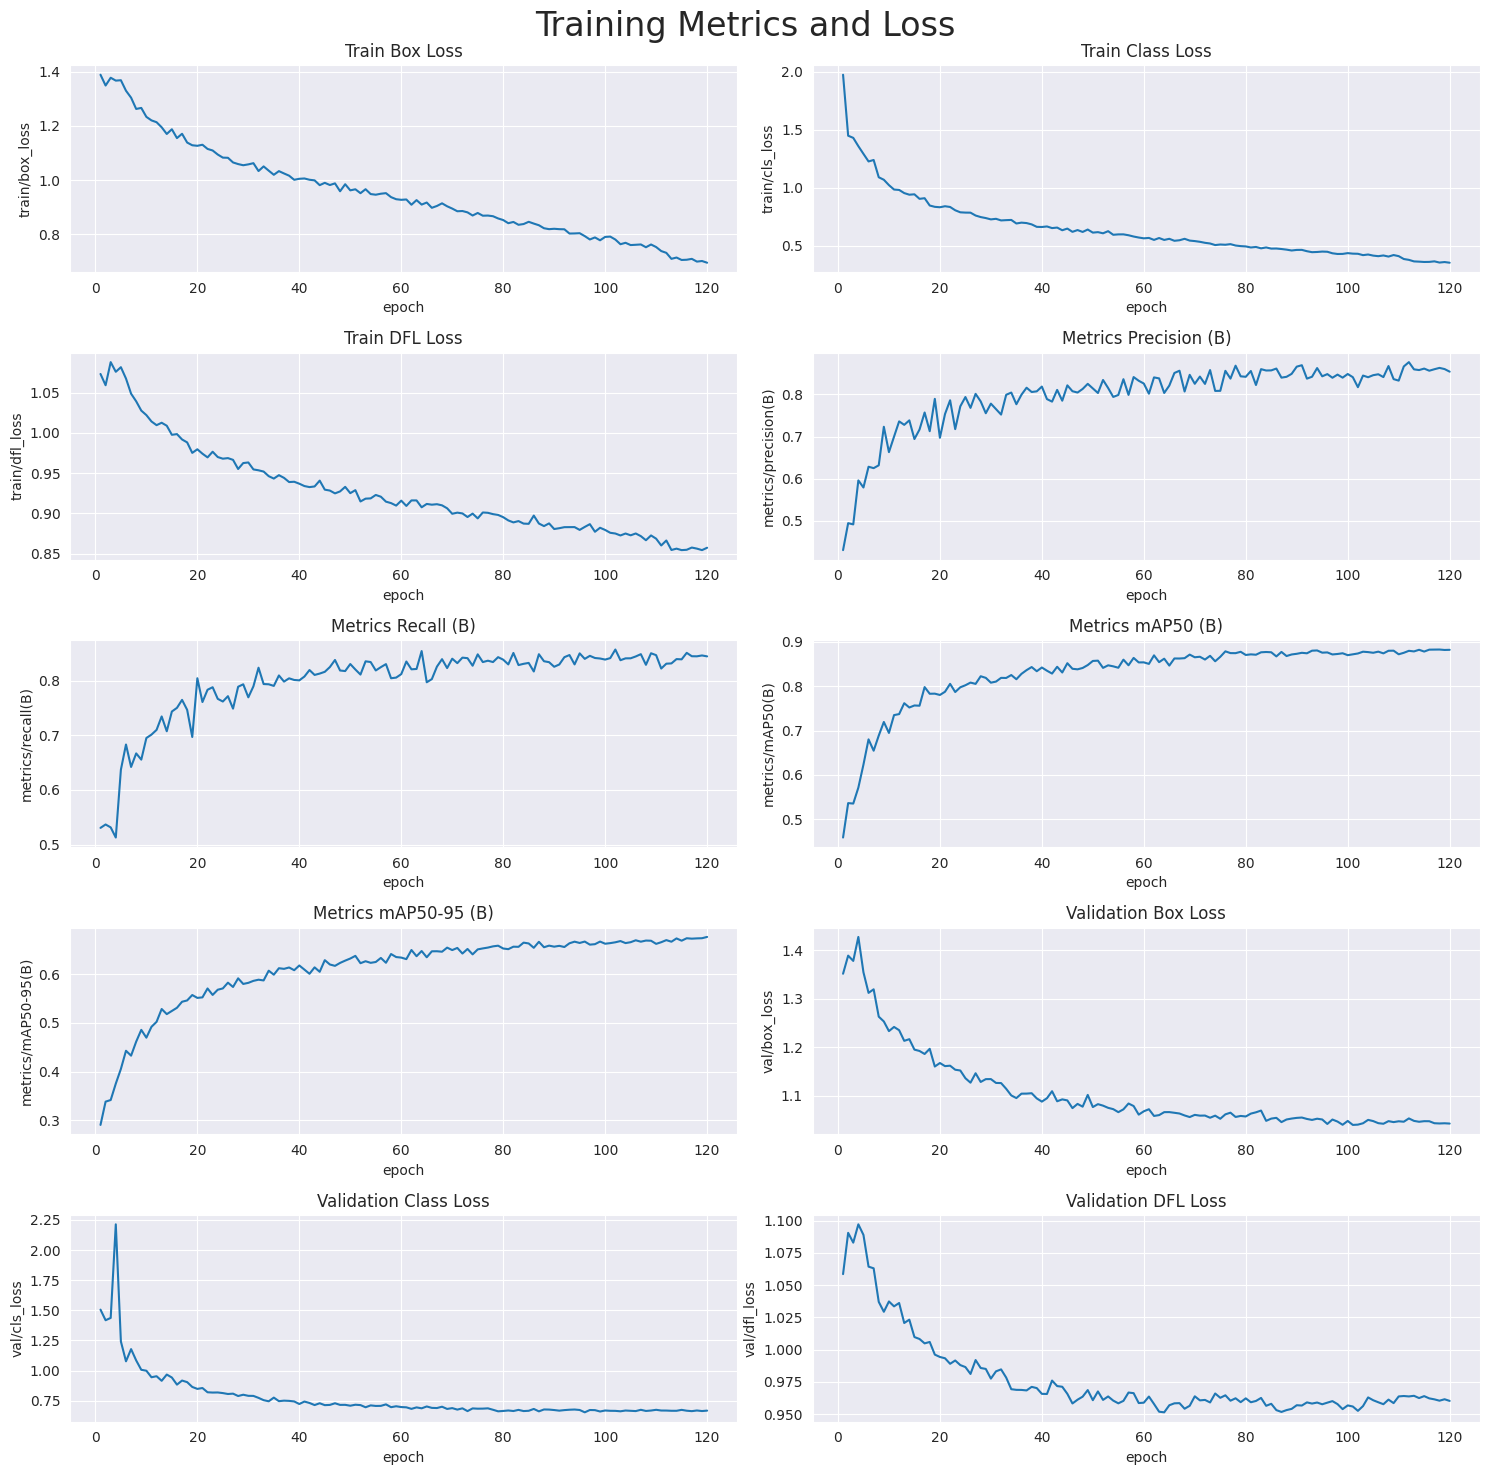

In [9]:
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/yolo8/result/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Results

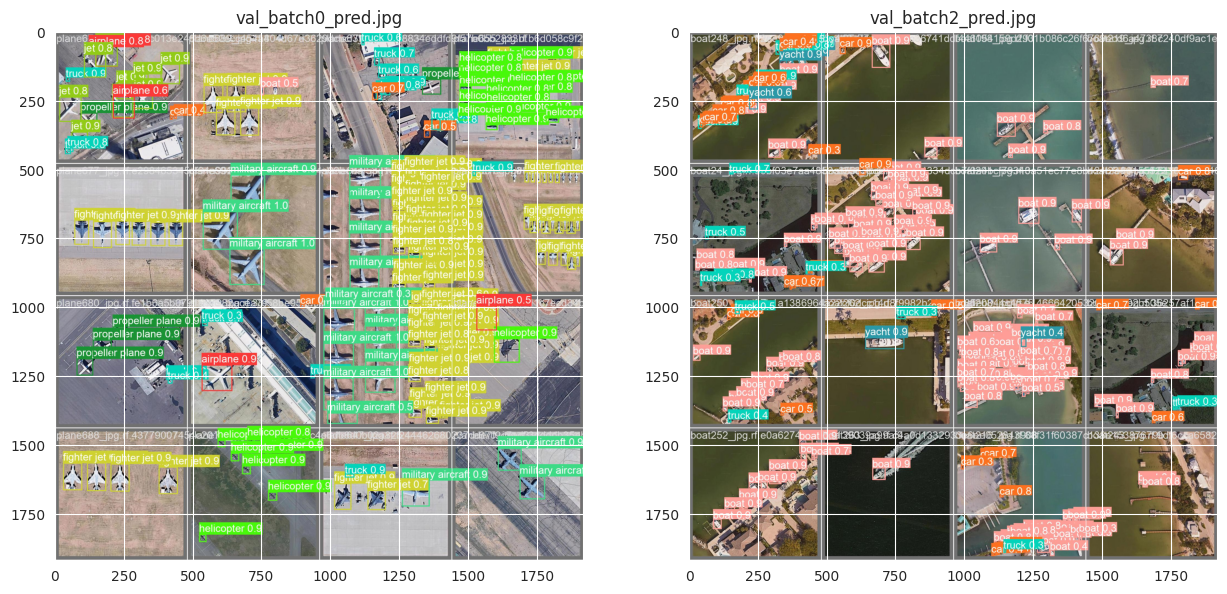

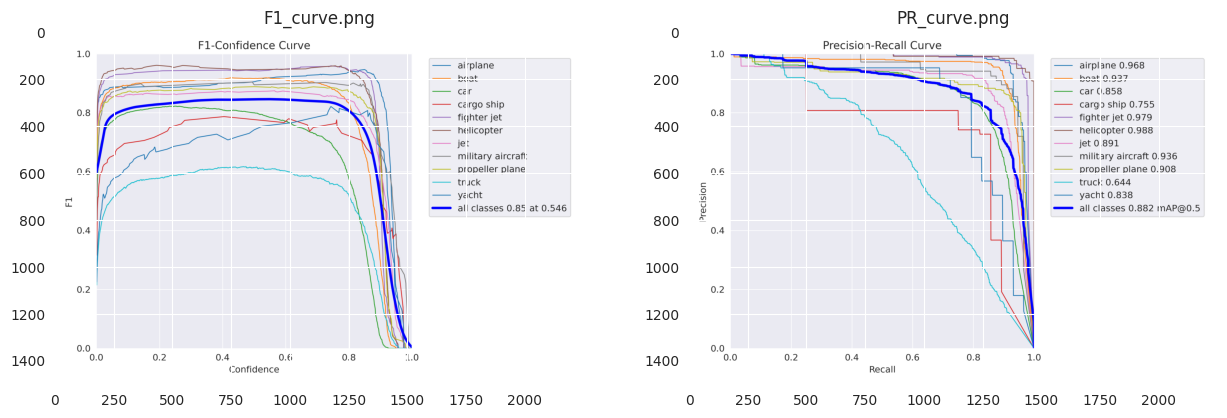

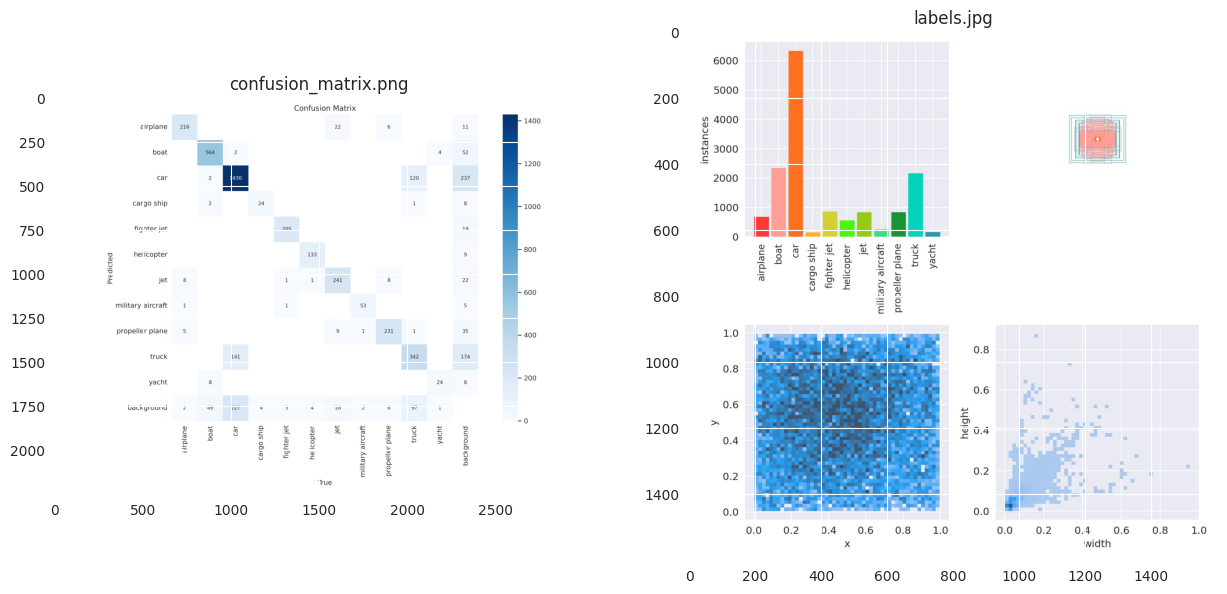

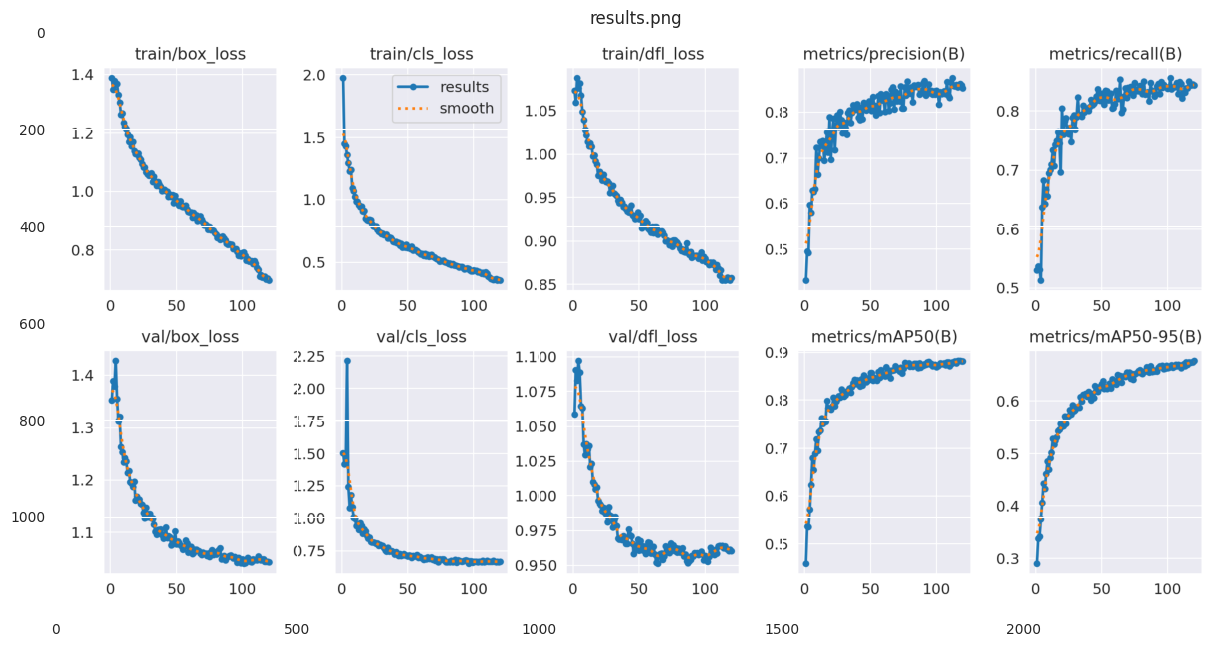

In [10]:
model_path = '/kaggle/working/yolo8/result/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png', 'labels.jpg'], (1, 2))
plot(['results.png'], (1, 1))


## Test Set

In [11]:
Valid_model  = YOLO('/kaggle/working/yolo8/result/weights/best.pt')
metric = Valid_model.val(split = 'test') 

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/test/labels... 210 images, 1 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<00:00, 240.49it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/sr-det-512/SR-DET-512/sat-gen-512x512/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.50it/s]


                   all        210       2088       0.89      0.866      0.914      0.712
              airplane        210        142      0.918      0.915      0.942       0.76
                  boat        210        497      0.943      0.823      0.943      0.679
                   car        210        883      0.903      0.691      0.872      0.562
            cargo ship        210         23      0.877      0.957      0.961      0.838
           fighter jet        210          5          1      0.972      0.995      0.782
            helicopter        210         54       0.92      0.944      0.957      0.711
                   jet        210         85      0.913      0.869      0.953      0.796
     military aircraft        210         23       0.94      0.957      0.953      0.795
       propeller plane        210         74       0.96      0.974      0.981      0.748
                 truck        210        279      0.718      0.466      0.569       0.38
                 yach

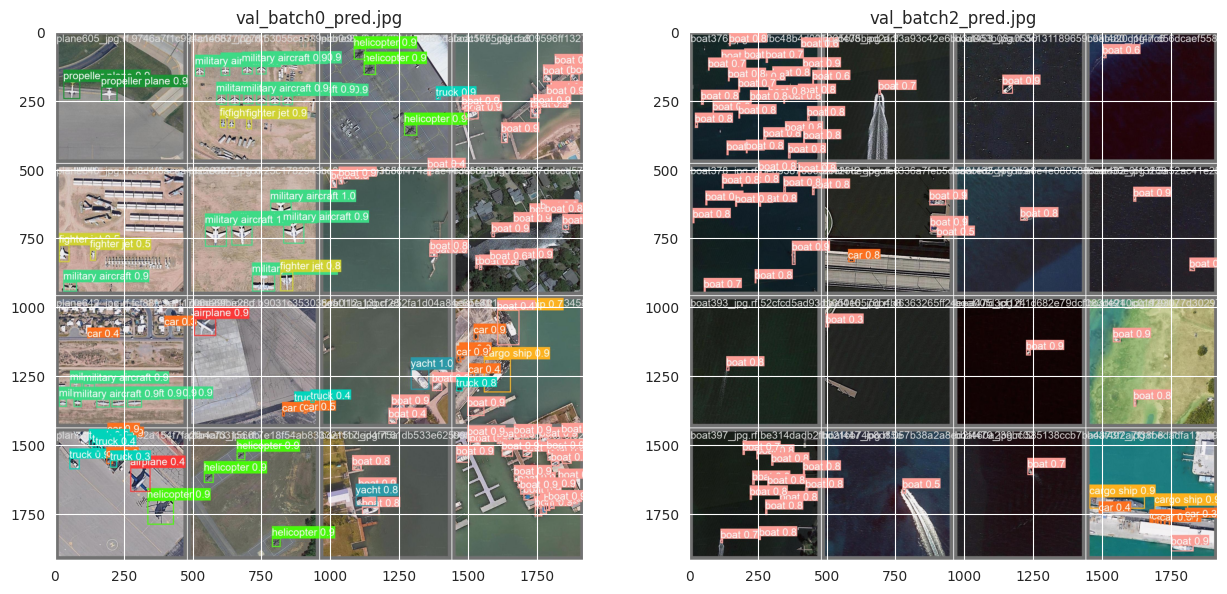

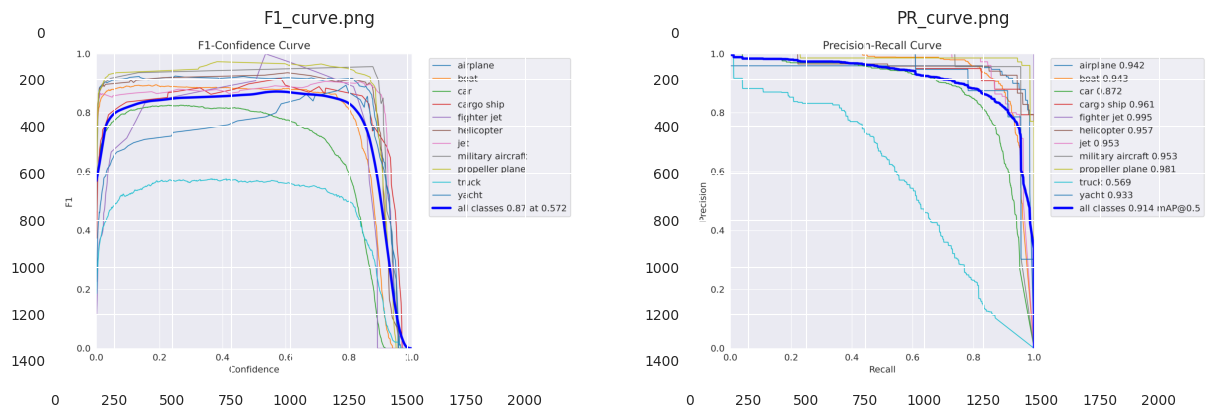

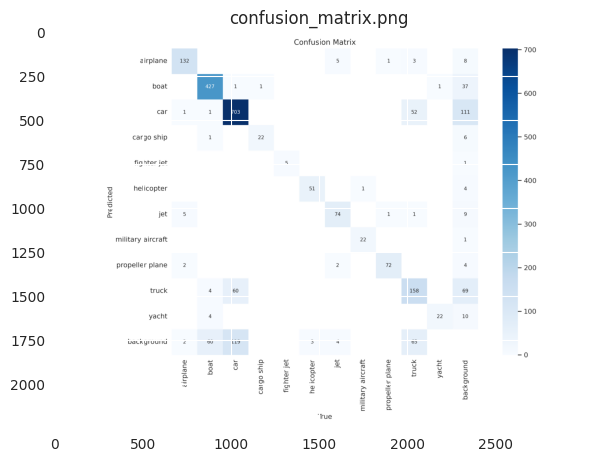

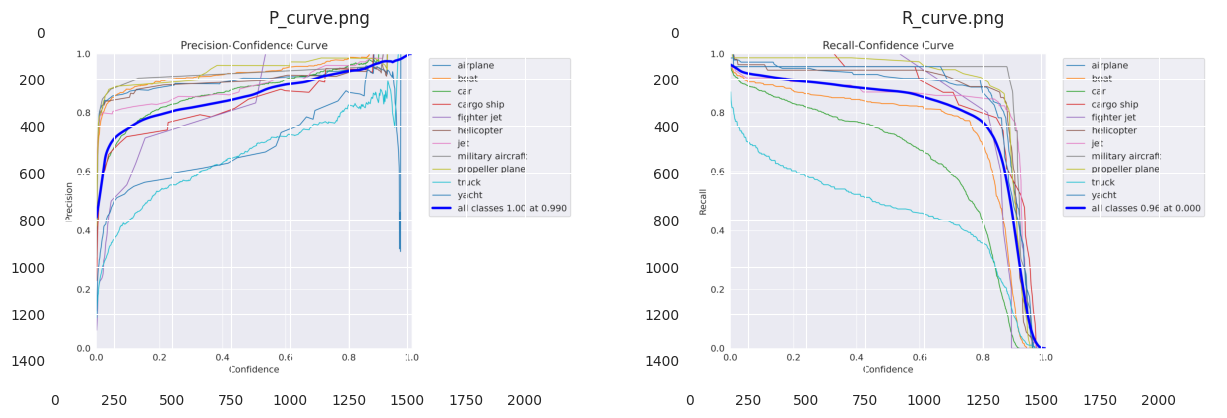

In [12]:
model_path = '/kaggle/working/runs/detect/val/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png'], (1, 2))
plot(['P_curve.png','R_curve.png'], (1, 2))


# Prediction

In [13]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 512x512 3 boats, 25.3ms
Speed: 2.4ms preprocess, 25.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 6 cars, 1 truck, 25.2ms
Speed: 1.7ms preprocess, 25.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 cars, 23.3ms
Speed: 1.7ms preprocess, 23.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 boat, 23.4ms
Speed: 1.7ms preprocess, 23.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 car, 2 trucks, 23.1ms
Speed: 1.7ms preprocess, 23.1ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 boat, 23.8ms
Speed: 2.0ms preprocess, 23.8ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 cars, 1 truck, 23.1ms
Speed: 1.8ms preprocess, 23.1ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 military aircrafts, 23.0ms
Speed: 1.9ms preprocess, 23.0ms inference, 1.3ms postprocess pe

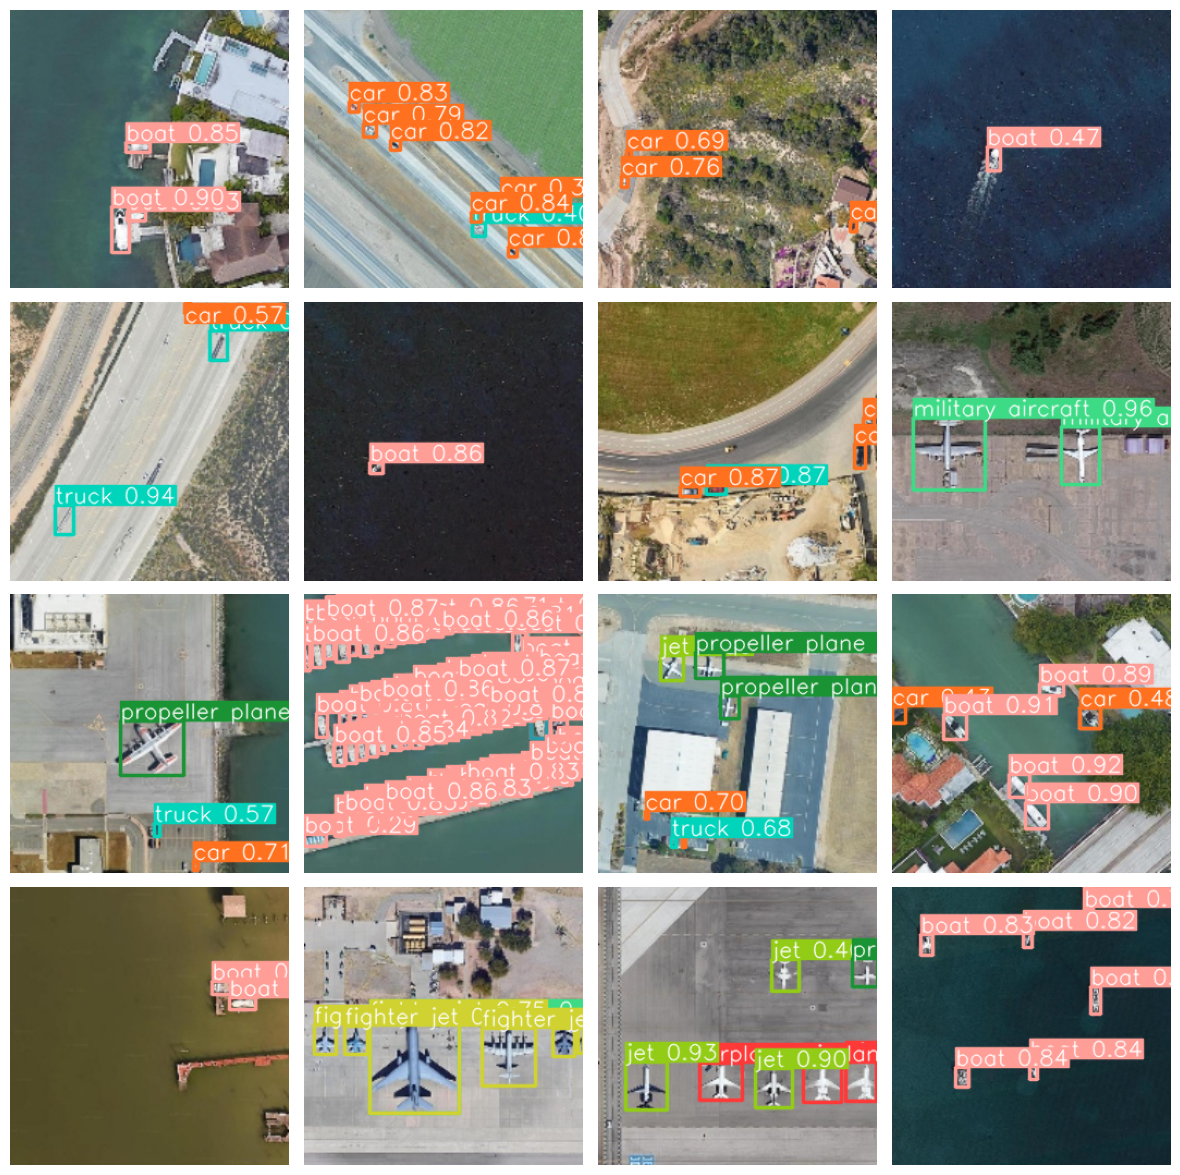

In [14]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/sr-det/sat-low-256x256/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)